In [24]:
import csv
import numpy as np

days = 200
trials = 10000
datas = []

peak_values_per_trial = []

for d in range(trials):
    datas.append([])

In [25]:
with open("non-policy.csv", newline="\n") as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='\"')
    trial_list = []
    for row in reader:
        trial = int(row[0])
        day = int(row[1])
        value = int(row[2])

        trial_list.append(value)

        if day == 200:
            datas[trial] = trial_list
            peak_values_per_trial.append(value)
            trial_list = []

In [26]:
peak_values_per_trial = np.array(peak_values_per_trial)
infimum = np.percentile(peak_values_per_trial, 25)
supereme = np.percentile(peak_values_per_trial, 75)

i = 0
quantilized_trial_index = []
for t in peak_values_per_trial:
    if t >= infimum and t <= supereme:
        quantilized_trial_index.append(i)
    i += 1

In [27]:
datas = np.array(datas)
quantilized_datas = datas[quantilized_trial_index]

In [28]:
averaged_datas = np.array([])
for day in range(days):
    averaged_datas = np.append(averaged_datas, np.mean(quantilized_datas[:, day]))

averaged_datas

array([  2.86219703,   5.3792025 ,   8.4736122 ,  12.36493354,
        16.79378421,  21.85105551,  27.78811572,  34.74511337,
        42.78967944,  51.64601251,  61.54515246,  72.77541048,
        85.53694292,  99.46559812, 114.62685692, 131.20387021,
       149.39249414, 168.97986708, 189.65715403, 211.48670837,
       234.54671618, 258.58678655, 283.35007819, 308.71129789,
       334.41028147, 360.5893276 , 386.50351837, 411.95777952,
       437.01915559, 461.59753714, 485.3303362 , 507.9820172 ,
       529.78401095, 550.4865129 , 569.95914777, 588.27580141,
       605.44331509, 621.34147772, 636.06548084, 649.56372166,
       662.05590305, 673.54241595, 684.00684128, 693.52716966,
       702.143276  , 710.05805317, 717.19077404, 723.59421423,
       729.38017983, 734.60242377, 739.23084441, 743.40422205,
       747.14640344, 750.55492572, 753.59734167, 756.29280688,
       758.71579359, 760.88311181, 762.81763096, 764.56352619,
       766.10379203, 767.49589523, 768.74198593, 769.85

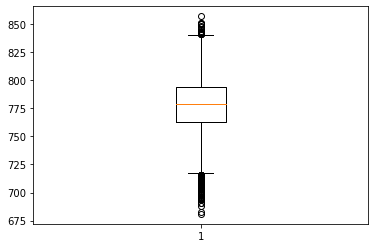

In [29]:
import matplotlib.pyplot as plt
X = np.array(range(trials))
peak_value_boxplot = plt.boxplot(peak_values_per_trial)

(array([  17.,   55.,  282.,  945., 1967., 2997., 2476., 1022.,  215.,
          24.]),
 array([681. , 698.6, 716.2, 733.8, 751.4, 769. , 786.6, 804.2, 821.8,
        839.4, 857. ]),
 <a list of 10 Patch objects>)

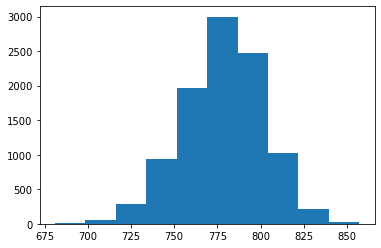

In [30]:
plt.hist(peak_values_per_trial)